## Importiere `pandas`, `matplotlib`

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import locale
from configparser import ConfigParser

## Lade die Konfigurationen aus `config.ini`
#### Definiere die Umgebung

In [11]:
config = ConfigParser()
files = config.read('config.ini')

# Wechsel des plt.style per config.ini machbar.
plt.style.use(config.get('theme', 'plt.style'))

# Damit Daten mit den deutschen Begriffen für die Monat generiert werden.
locale = locale.setlocale(locale.LC_TIME, "de_DE")

In [ ]:
env = 'test'
database_file = config.get(env, 'database_file')
date_begin = config.get(env, 'date_begin')
date_end = config.get(env, 'date_end')
dpi = config.get(env, 'dpi')

# Beginn

In [ ]:
df = pd.read_json(database_file)

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [ ]:
df = df.loc[(df['date'] >= "2022-07-16") & (df['date'] <= "2022-12-10")]

#### Füge ein neues Feature hinzu: Themengebiet

In [ ]:
topics = json.loads(open("topics/topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

#### Filter die Artikel nach: Themengebiet (Covid-19-Pandemie)

In [ ]:
df = df.loc[df.topic == "Covid-19-Pandemie"]

#### Unterteile nach erster, mittlerer und letzter Woche

In [ ]:
# 1. Woche von 18.07.2022 - 24.07.2022
# 0.5. Woche von 05.09.2022 - 11.09.2022
# -1. Woche von 17.10.2022 - 23.10.2022

df_first = df.loc[(df['date'] >= "2022-07-18") & (df['date'] <= "2022-07-24")]
df_middle = df.loc[(df['date'] >= "2022-09-05") & (df['date'] <= "2022-09-11")]
df_last = df.loc[(df['date'] >= "2022-10-17") & (df['date'] <= "2022-10-23")]

In [ ]:
data = {'week_start': ['2022-07-18', '2022-09-05', '2022-10-17'],
        'week_end': ['2022-07-24', '2022-09-11', '2022-10-23'],
        'amount': [len(df_first), len(df_middle), len(df_last)]}

df = pd.DataFrame(data)


df[['week_start', 'week_end']] = df[['week_start', 'week_end']].apply(pd.to_datetime)

df['week'] = df['week_start'].dt.strftime("%d. %B %Y") + " bis \n" + df['week_end'].dt.strftime("%d. %B %Y")

## Balkendiagramm

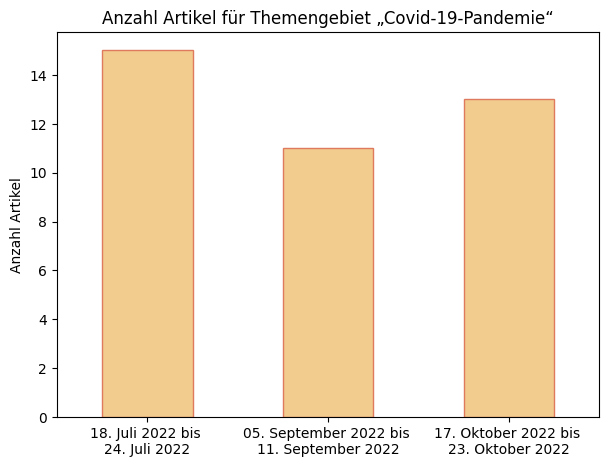

In [ ]:
ax = df.plot(kind="bar", x="week", y="amount", ylabel="Anzahl Artikel", figsize=(7,5), rot=0, legend=False, color="#f2cc8f", edgecolor='#e07a5f', title="Anzahl Artikel für Themengebiet „Covid-19-Pandemie“")
ax.axes.get_xaxis().get_label().set_visible(False)

ax.get_figure().savefig('figures/bar-final.png', bbox_inches="tight")